In [ ]:
!pip install tensorflow
!pip install pydub
!pip install pandas
!pip install phonemizer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 916.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.4/213.4 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 33.4 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136818 sha256=6532e8b34c7fc8dec61e6647226e2372726a7fae01996b7a64f3dbdb581e14cd
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
import librosa
import numpy as np

audio_path = '/content/D Trump1.wav'
sr = 44100  # Sample rate

# Load audio file
audio, sr = librosa.load(audio_path, sr=sr)


In [ ]:
from pydub import AudioSegment
t1 = 440 #Works in milliseconds
t2 = 56960
newAudio = AudioSegment.from_wav(audio_path)
newAudio = newAudio[t1:t2]
newAudio.export('newSong.wav', format="wav")

<_io.BufferedRandom name='newSong.wav'>

In [ ]:
from pydub import AudioSegment
t1 = 56960 #Works in milliseconds
t2 = 114260
newAudio = AudioSegment.from_wav(audio_path)
newAudio = newAudio[t1:t2]
newAudio.export('newSong.wav', format="wav")

<_io.BufferedRandom name='newSong.wav'>

In [ ]:
from pydub import AudioSegment
t1 = 114960 #Works in milliseconds
t2 = 173060
newAudio = AudioSegment.from_wav(audio_path)
newAudio = newAudio[t1:t2]
newAudio.export('newSong.wav', format="wav")

<_io.BufferedRandom name='newSong.wav'>

In [ ]:
from pydub import AudioSegment
t1 = 173760 #Works in milliseconds
t2 = 231340
newAudio = AudioSegment.from_wav(audio_path)
newAudio = newAudio[t1:t2]
newAudio.export('newSong.wav', format="wav")

<_io.BufferedRandom name='newSong.wav'>

In [ ]:
from pydub import AudioSegment
t1 = 231720 #Works in milliseconds
t2 = 288900
newAudio = AudioSegment.from_wav(audio_path)
newAudio = newAudio[t1:t2]
newAudio.export('newSong.wav', format="wav")

<_io.BufferedRandom name='newSong.wav'>

In [ ]:
from pydub import AudioSegment
t1 = 289600 #Works in milliseconds
t2 = 312460
newAudio = AudioSegment.from_wav(audio_path)
newAudio = newAudio[t1:t2]
newAudio.export('newSong.wav', format="wav")

<_io.BufferedRandom name='newSong.wav'>

In [ ]:
import pandas as pd
from pydub import AudioSegment
df = pd.read_csv("/content/data.csv")
text = []

i = 0
# iterate in the data frame
# t1 = startTime
# t2 = endTime
# AudioSegment.from_wav(audio_path)[t1:t2].export("i.wav", format = "wav")
# text.append(df['text'])
# i += 1

FileNotFoundError: ignored

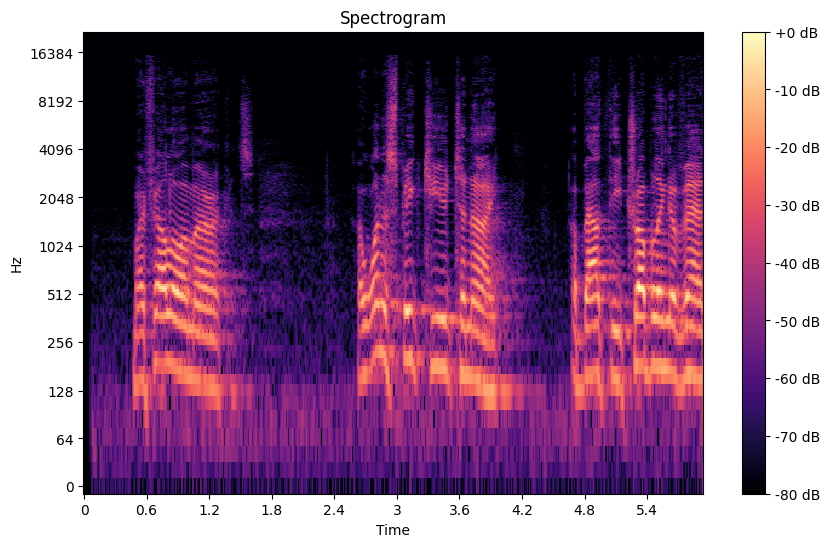

In [ ]:
import matplotlib.pyplot as plt

# Compute spectrogram
spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)

# Display spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()


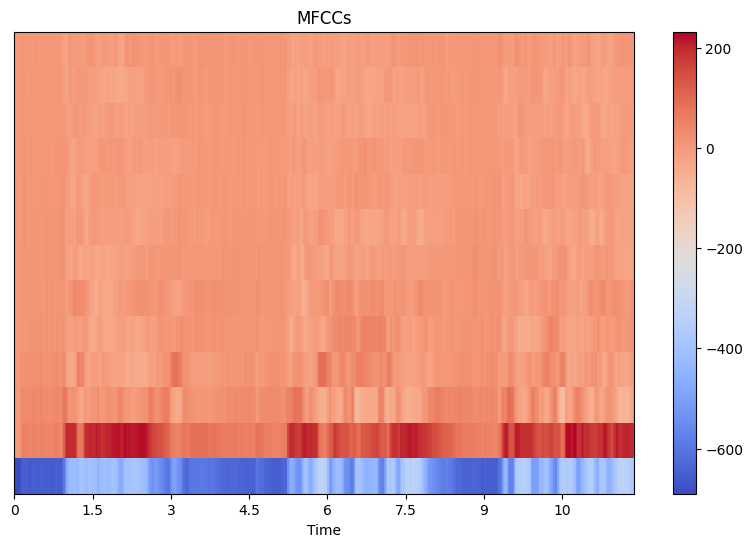

In [ ]:
# Extract MFCCs
mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

# Display MFCCs
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.show()


In [ ]:
!pip install eng-to-ipa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eng-to-ipa: filename=eng_to_ipa-0.0.2-py3-none-any.whl size=2822606 sha256=1a26f288b8ec0c8148aad983fd0a4718c581cf0903b80c628626867b92aadbdc
  Stored in directory: /root/.cache/pip/wheels/5b/ab/07/fe6722f710d8ef8bd0ccb4eb689ef96f5552f3fc0c80c1aa9c
Successfully built eng-to-ipa


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import librosa
import numpy as np
# Import the required library
from phonemizer import phonemize
from phonemizer.backend import EspeakBackend
import eng_to_ipa as p


#  Define paths to your data
text_data_path = '/content/D Trump - 20.txt'  # Each line contains text
audio_data_path = '/content/D Trump1.wav'  # Directory containing audio files

# # Read text data from file
with open(text_data_path, 'r') as f:
     text_lines = f.read().splitlines()


# Load and preprocess audio and text data
audio_samples = []
phoneme_sequences = []
sr = 44100  # Sample rate (adjust to match your audio data)

# Split audio into segments based on time intervals (milliseconds)
segment_intervals = [
    (440, 56960),
    (56960, 114260),
    (114960, 173060),
    (173760, 231340),
    (231720, 288900),
    (289600, 312460)
]

# Define a function to convert text to phonemes
def convert_text_to_phonemes(text):
    # Specify the language and the separator (you can adjust this as needed)
    lang = "en-us"
    separator = " "  # Separate phonemes with a space

    # Convert text to phonemes
    phonemes = p.convert(text)

    return phonemes

# Load and preprocess each segment of the audio
for text_line, (start_ms, end_ms) in zip(text_lines, segment_intervals):
    # Extract the corresponding audio segment
    audio_segment = AudioSegment.from_wav(audio_data_path)[start_ms:end_ms]

    # Convert the audio segment to a numpy array
    audio = np.array(audio_segment.get_array_of_samples())

    # Preprocess audio (normalize, resample, etc.)
    # preprocessed_audio = librosa.util.normalize(audio, axis = 0)

    # print("1: ", len(preprocessed_audio))

    # audio_samples.append(preprocessed_audio)
    audio_samples.append(audio)
    print(len(audio))

    # Convert text to phonemes or embeddings (preprocessing step)
    phoneme_sequence = convert_text_to_phonemes(text_line)

    phoneme_sequences.append(phoneme_sequence)

# Convert lists to NumPy arrays
print(audio_samples)
audio_samples = pad_sequences(audio_samples, maxlen=5124420, padding='post', truncating='post', value=0)
# Convert to TensorFlow tensor
audio_samples = tf.convert_to_tensor(audio_samples)
# Split data into training and validation sets
train_size = int(0.8 * len(audio_samples))
train_dataset = tf.data.Dataset.from_tensor_slices(
    (audio_samples[:train_size], phoneme_sequences[:train_size]))
val_dataset = tf.data.Dataset.from_tensor_slices(
    (audio_samples[train_size:], phoneme_sequences[train_size:]))

print(train_size)



4985064
5053860
5124420
5078556
5043276
2016252
[array([ -15,  -15,  -14, ..., 1676, 1787, 1787], dtype=int16), array([1903, 1903, 1977, ...,   -1,   -2,   -2], dtype=int16), array([-916, -916, -935, ...,   -4,   -5,   -5], dtype=int16), array([-1174, -1174, -1118, ...,   -14,   -14,   -14], dtype=int16), array([ 12,  12,  12, ..., -42, -40, -40], dtype=int16), array([138, 138, 127, ...,   0,   1,   1], dtype=int16)]
4


In [ ]:
# Shuffle, batch, and prefetch the datasets
batch_size = 16

# Shuffle the training dataset, specifying an appropriate buffer size
shuffle_buffer_size = train_size  # You can adjust this based on your dataset size

train_dataset = train_dataset.shuffle(buffer_size=shuffle_buffer_size).batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [ ]:
pip install -r requirements.txt

In [ ]:
import torch
from scipy.io.wavfile import write
import argparse

In [ ]:
def text_to_audio(input_text):
    tacotron2 = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_tacotron2', model_math='fp16')
    tacotron2 = tacotron2.to('cuda')
    tacotron2.eval()

    waveglow = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_waveglow', model_math='fp16')
    waveglow = waveglow.remove_weightnorm(waveglow)
    waveglow = waveglow.to('cuda')
    waveglow.eval()

    utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_tts_utils')
    sequences, lengths = utils.prepare_input_sequence([input_text])

    with torch.no_grad():
        mel, _, _ = tacotron2.infer(sequences, lengths)
        audio = waveglow.infer(mel)
    audio_numpy = audio[0].data.cpu().numpy()
    rate = 22050

    write("audio.wav", rate, audio_numpy)

In [ ]:

ap = argparse.ArgumentParser()
ap.add_argument("-t", "--text", required = True, help = "Text to convert")
args = vars(ap.parse_args())

text_to_audio(args["text"])
print("Finished!")

usage: ipykernel_launcher.py [-h] -t TEXT
ipykernel_launcher.py: error: the following arguments are required: -t/--text


SystemExit: ignored